# Sessionization by both IP Address and SendID

,SessionID,SessionDate,SessionDuration,RequestCount,CompanyCount,UserAgentCount,OpenCount,ClickCount,UniqueLinkCount
0,{A3E20A35-7B72-DFE6-9C7E-409A6D237F45},2019-07-15 12:01:12.667000000,0,1,1,1,1,0,1
1,{94B697B3-5ACB-4057-9EE2-421A7898C1A7},2019-07-15 12:46:30.513000000,0,1,1,1,1,0,1
2,{B5C6F911-55C5-8165-F7DD-DCA337D98C2C},2019-07-15 12:24:34.460000000,5,2,1,1,1,0,1
3,{A884AB3A-EAE9-B914-4D6B-ABAA335E697F},2019-07-15 12:48:34.113000000,0,1,1,1,0,1,1
4,{DC7D1100-0B5B-0FC7-4B89-2E7594F31079},2019-07-15 12:03:30.583000000,5,2,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1197049,{1E24E8E5-ACDD-BC9E-8401-768E7859B201},2019-07-15 12:44:59.923000000,6,2,1,1,1,0,1
1197050,{C4DCF7F1-D01B-6F3B-44C9-FEEE4B0A35EE},2019-07-15 12:00:43.690000000,0,1,1,1,1,0,1
1197051,{4F17273F-D5A4-BC43-A423-DE084DFE40CF},2019-07-15 12:19:07.823000000,6,2,1,1,1,0,1
1197052,{2AE7CAEF-4CCA-439F-2637-08661612C108},2019-07-15 12:39:37.917000000,6,2,1,1,1,0,1


SessionID          object
SessionDate        object
SessionDuration     int64
RequestCount        int64
CompanyCount        int64
UserAgentCount      int64
OpenCount           int64
ClickCount          int64
UniqueLinkCount     int64
dtype: object


<Figure size 432x288 with 0 Axes>

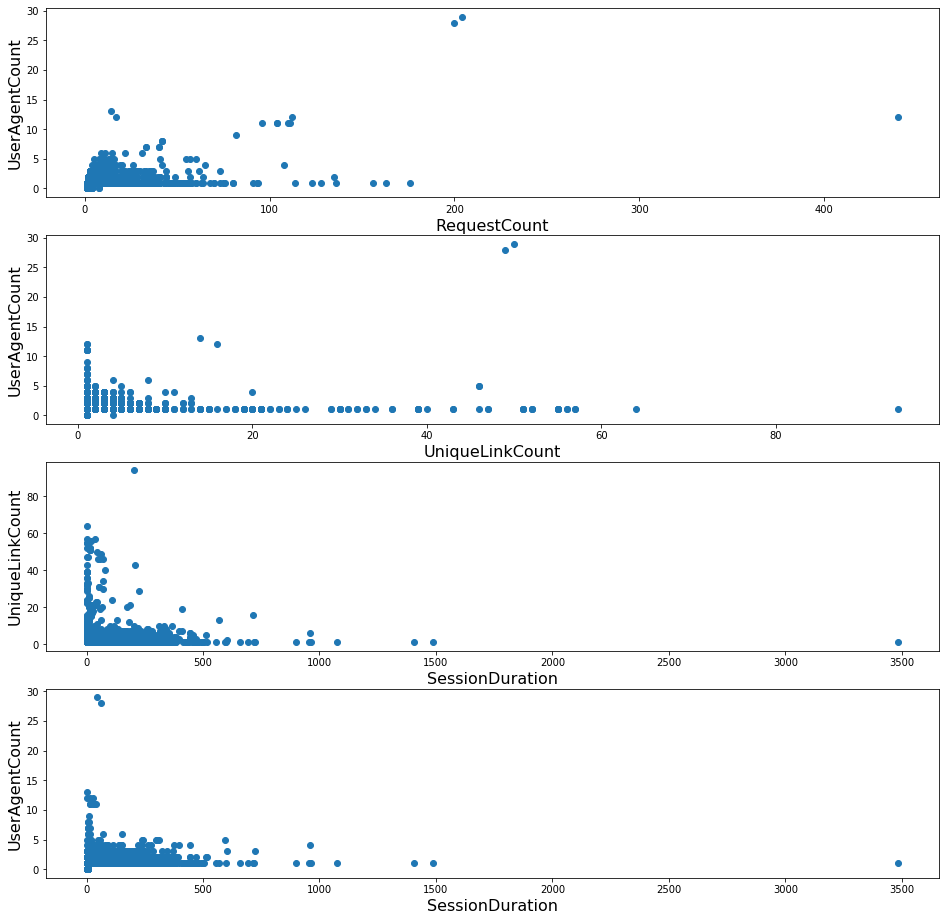

<Figure size 432x288 with 0 Axes>

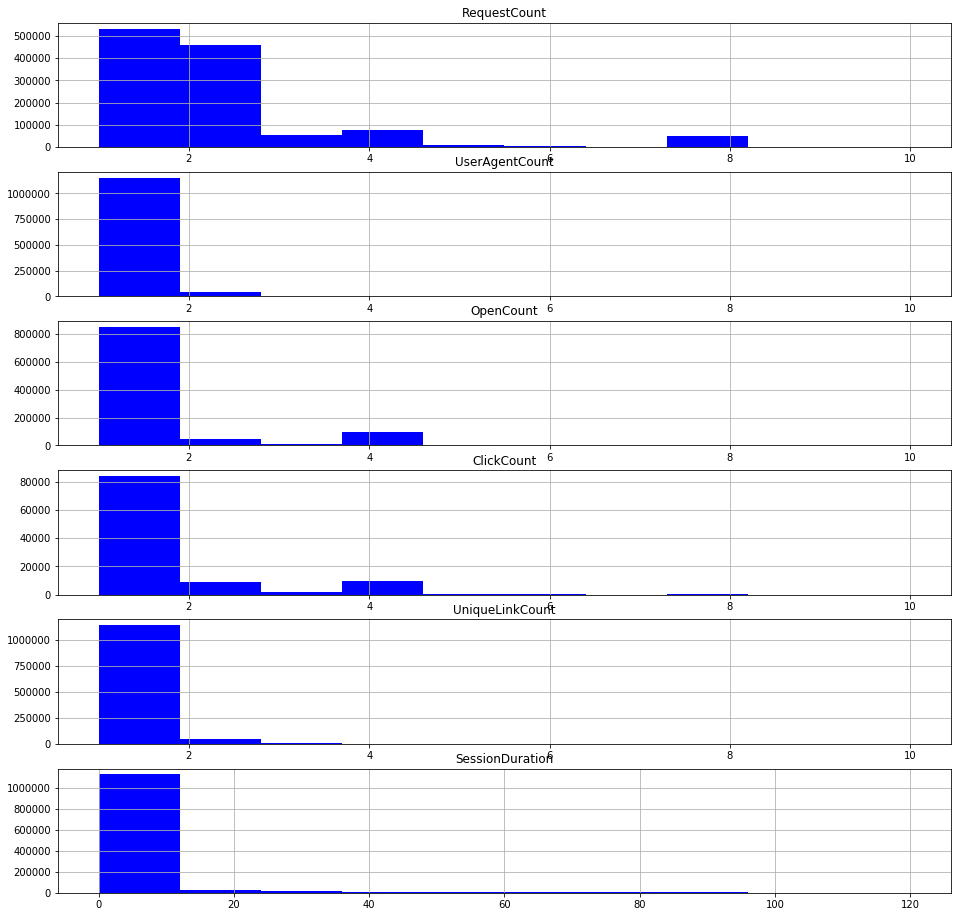

,SessionDuration,RequestCount,CompanyCount,UserAgentCount,OpenCount,ClickCount,UniqueLinkCount
SessionDuration,1,0.341981,nan,0.327311,0.222466,0.225906,0.274316
RequestCount,0.341981,1,nan,0.265685,0.808602,0.345475,0.290116
CompanyCount,nan,nan,nan,nan,nan,nan,nan
UserAgentCount,0.327311,0.265685,nan,1,0.08317,0.397325,0.50916
OpenCount,0.222466,0.808602,nan,0.08317,1,-0.0347568,0.0167307
ClickCount,0.225906,0.345475,nan,0.397325,-0.0347568,1,0.694554
UniqueLinkCount,0.274316,0.290116,nan,0.50916,0.0167307,0.694554,1


In [2]:

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.cm as cm
from IPython.display import display

%matplotlib inline

df = pd.read_csv("C:/Users/ryoucis/Documents/EmailTrackingSessions_IPandSendID.csv")

# Show dataframe
pd.options.display.max_columns = None
display(df) # show raw data
print(df.dtypes)

# Filter out outliers
df = df[df["RequestCount"] < 500]

# Show a few scatter
def SetScatterSubPlot(ax, X,Y):
    ax.set_xlabel(X, fontsize=16)
    ax.set_ylabel(Y, fontsize=16)
    ax.scatter(df[X], df[Y])

plt.clf()
fig, ax = plt.subplots(nrows=4, ncols=1, figsize = (16,16))    
SetScatterSubPlot(ax[0], "RequestCount", "UserAgentCount")
SetScatterSubPlot(ax[1], "UniqueLinkCount", "UserAgentCount")
SetScatterSubPlot(ax[2], "SessionDuration", "UniqueLinkCount")
SetScatterSubPlot(ax[3], "SessionDuration", "UserAgentCount")
plt.show()

# Histos
def SetHistoSubPlot(ax, X, bins=10, range=(1,10)):
    ax.hist(df[X], bins=bins, range=range, color="blue")
    ax.set_title(X)
    ax.grid(True)
    ax.tick_params('both')

plt.clf()
fig, ax = plt.subplots(nrows=6, ncols=1, figsize = (16,16))

SetHistoSubPlot(ax[0], "RequestCount")
SetHistoSubPlot(ax[1], "UserAgentCount")
SetHistoSubPlot(ax[2], "OpenCount")
SetHistoSubPlot(ax[3], "ClickCount")
SetHistoSubPlot(ax[4], "UniqueLinkCount")
SetHistoSubPlot(ax[5], "SessionDuration", range=(0,120))
plt.show()


# Show dataframe corrlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
